# Basic CNN_Model_0



## 1. Importing and loading the preprocessed dataset

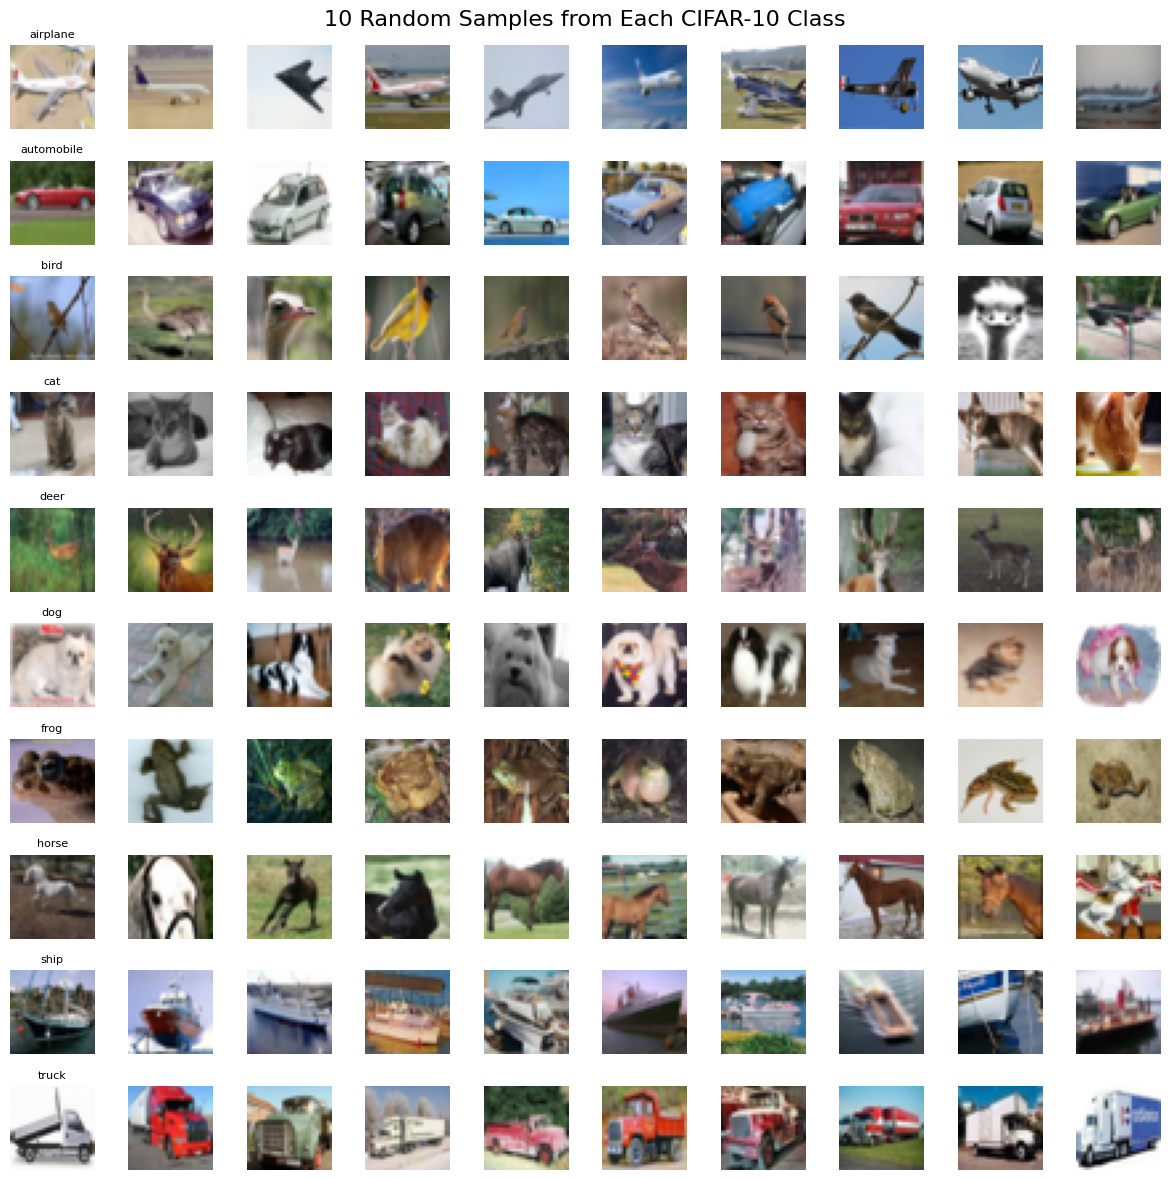

In [1]:
import nbformat
from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

 ## 2. Model building

In [2]:
# First we will clear the keras session
from keras.backend import clear_session
clear_session()


#### 2.1 Defining model architecture

In [3]:
# We will start with a basic model:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow import keras # Import the keras module

model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))



model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 638,454 (2.44 MB)

 Trainable params: 638,454 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Model training

#### 3.1 Compiling the model

In [4]:

# Defining batch size and nº of epochs and compiling the model using the defined parameters:

batch_size = 512
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


#### 3.2 Fitting the model to the training data

In [5]:
# Fitting the model.:
%%time

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.3030 - loss: 1.9359 - val_accuracy: 0.4716 - val_loss: 1.4687
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5155 - loss: 1.3703 - val_accuracy: 0.5704 - val_loss: 1.2441
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5861 - loss: 1.1900 - val_accuracy: 0.6016 - val_loss: 1.1617
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6159 - loss: 1.1009 - val_accuracy: 0.6248 - val_loss: 1.0885
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6479 - loss: 1.0182 - val_accuracy: 0.6440 - val_loss: 1.0344
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6722 - loss: 0.9534 - val_accuracy: 0.6600 - val_loss: 0.9980
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6873 - loss: 0.9046 - val_accuracy: 0.6602 - val_loss: 1.0003
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7014 - loss: 0.8694 - val_accuracy: 0.6502 - 

#### 3.3 Plot training history (loss/accuracy curves)

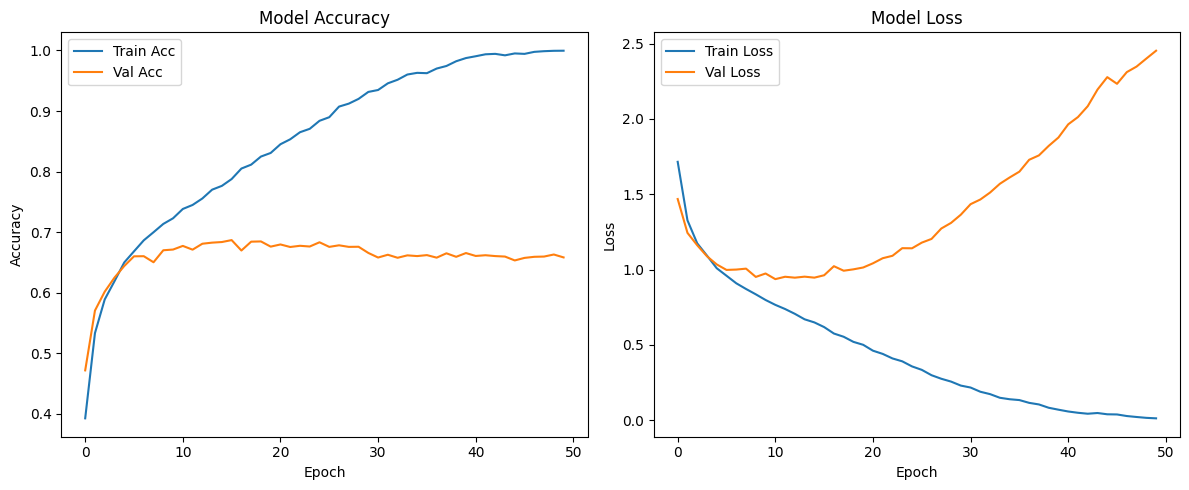

In [6]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 4. Model evaluation

#### 4.1 Evaluate on the test set

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')

Test accuracy: 0.6418
Test loss: 2.5681


#### 4.2 Calculate metrics: Precision, recall, F1 score

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get predictions from the model
y_pred = model.predict(x_test)

# Convert one-hot encoded labels and predictions to class indices
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score, using 'macro' average, as the classes are balanced (6k images per class)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.6452
Recall: 0.6418
F1 Score: 0.6427


#### 4.3 Confusion matrix and classification report

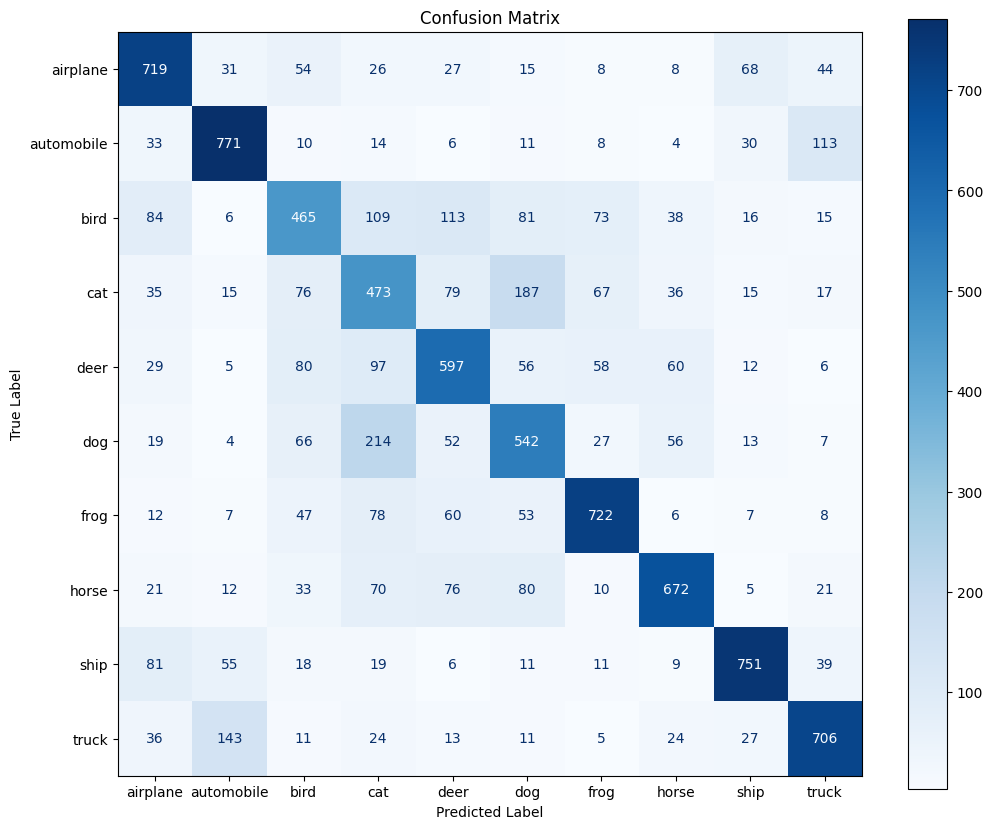

Classification Report:
              precision    recall  f1-score   support

    airplane       0.67      0.72      0.70      1000
  automobile       0.73      0.77      0.75      1000
        bird       0.54      0.47      0.50      1000
         cat       0.42      0.47      0.45      1000
        deer       0.58      0.60      0.59      1000
         dog       0.52      0.54      0.53      1000
        frog       0.73      0.72      0.73      1000
       horse       0.74      0.67      0.70      1000
        ship       0.80      0.75      0.77      1000
       truck       0.72      0.71      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



In [9]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=class_names))

## 5. Results and conclusion

We can observe that there is clearly a lot of overfitting in this model. From epoch 14 onwards, we can observe that the training accuracy keeps increasing and the loss decreasing considerably. However, when it comes to the validation data set, validation accuracy no longer improves (even decreases) and the val_loss keeps increasing (which is bad). Therefore, we might consider adding some EarlyStopping to tackle overfitting.

Nevertheless, the test accuracy of 0.6418 is not bad to be one of our first models, but val_loss should be drastically improved (2.5681).